In [1]:
import json
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cleaning

In [7]:
def clean_lyrics(text):
    early_part = text[:300]
    match = re.search(r"read more", early_part, re.IGNORECASE)
    if match:
        text = text[match.end():]
    text = re.sub(r"\[.*?\]", "", text)
    if "\n" in text:
        first_line_break = text.index("\n")
        text = text[first_line_break+1:]
        text = re.sub(r"\n{2,}", "\n", text)
        lines = [line.strip() for line in text.split("\n") if line.strip() != ""]
    return "\n".join(lines)

file_in = "Dainu_analize_1980_2020.json"
file_out = "Dainu_analize_1980_2020_cleaned.json"

with open(file_in, "r", encoding="utf-8") as file:
    data = json.load(file)

for song in data:
    if "lyrics" in song and song["lyrics"]:
        song["lyrics"] = clean_lyrics(song["lyrics"])

data.sort(key=lambda s: s["year"] if s["year"] is not None else 0)

with open(file_out, "w", encoding="utf-8") as file:
    json.dump(data, file, ensure_ascii=False, indent=2)

# Count for all periods

In [13]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

lemmatizer = WordNetLemmatizer()

file = "Dainu_analize_1980_2020_cleaned.json"

with open(file, "r", encoding="utf-8") as f:
    data = json.load(f)

stop_words = set(stopwords.words("english"))
extra_stop_words = {"oh", "la", "na", "ha", "yeah", "get", "go", "like", "come", "make", "one", "cause", "take", "say", "can't", "see", "never", "that's", "let"}
stop_words.update(extra_stop_words)

word_in_songs_counter = Counter()

def lemmatize_text(text):
    words = re.findall(r"\b[a-z']+\b", text.lower())
    lemmatized_words = [lemmatizer.lemmatize(lemmatizer.lemmatize(word, pos="v"), pos = "n")for word in words]
    return lemmatized_words

for song in data:
    lyrics = song.get("lyrics", "").lower()
    lemmatized_words = lemmatize_text(lyrics)
    filtered_unique_words = set(word for word in lemmatized_words if word not in stop_words)
    word_in_songs_counter.update(filtered_unique_words)

top = 10
for word, count in word_in_songs_counter.most_common(top):
    print(f"{word}: {count} dainose")

know: 250 dainose
love: 185 dainose
time: 179 dainose
want: 165 dainose
feel: 163 dainose
way: 145 dainose
tell: 134 dainose
baby: 133 dainose
think: 130 dainose
back: 124 dainose


# Count songs by period

In [14]:
with open(file, "r", encoding="utf-8") as f:
    data = json.load(f)

decade_ranges = [(1980, 1989), (1990, 1999), (2000, 2009), (2010, 2020)]
decade_counter = {f"{start}-{end}": 0 for start, end in decade_ranges}

for song in data:
    year = song.get("year")
    for start, end in decade_ranges:
        if start <= year <= end:
            label = f"{start}-{end}"
            decade_counter[label] += 1
            break
total_songs = 0
for label in decade_counter:
    count = decade_counter[label]
    total_songs += count
    print(f"{label}: {decade_counter[label]} dainų")

print(f"\nIš viso: {total_songs} dainų")

1980-1989: 103 dainų
1990-1999: 100 dainų
2000-2009: 103 dainų
2010-2020: 102 dainų

Iš viso: 408 dainų


# Count words by period

In [15]:
lemmatizer = WordNetLemmatizer()

file = "Dainu_analize_1980_2020_cleaned.json"

with open(file, "r", encoding="utf-8") as f:
    data = json.load(f)

stop_words = set(stopwords.words("english"))
extra_stop_words = {"oh", "la", "na", "ha", "yeah", "get", "go", "like", "come", "make", "one", "cause", "take", "say", "can't", "see", "never", "that's", "let"}
stop_words.update(extra_stop_words)

period_ranges = [(1980, 1989), (1990, 1999), (2000, 2009), (2010, 2020)]
period_word_counters = {f"{start}-{end}": Counter() for start, end in period_ranges}

def lemmatize_text(text):
    words = re.findall(r"\b[a-z']+\b", text.lower())
    lemmatized_words = [lemmatizer.lemmatize(lemmatizer.lemmatize(word, pos="v"), pos = "n")for word in words]
    return lemmatized_words

for song in data:
    year = song.get("year")
    lyrics = song.get("lyrics", "").lower()
    for start, end in period_ranges:
        if start <= year <= end:
            lemmatized_words = lemmatize_text(lyrics)
            filtered_unique_words = set(word for word in lemmatized_words if word not in stop_words)
            period_word_counters[f"{start}-{end}"].update(filtered_unique_words)
            break

top_p = 10
for label, counter in period_word_counters.items():
    print(f"\n{label}:")
    for word, count in counter.most_common(top_p):
        print(f"{word}: {count} dainose")


1980-1989:
know: 58 dainose
love: 56 dainose
time: 46 dainose
want: 39 dainose
feel: 39 dainose
heart: 38 dainose
night: 33 dainose
look: 31 dainose
right: 31 dainose
way: 31 dainose

1990-1999:
know: 55 dainose
time: 49 dainose
want: 44 dainose
feel: 42 dainose
life: 40 dainose
love: 34 dainose
tell: 32 dainose
way: 31 dainose
give: 29 dainose
baby: 29 dainose

2000-2009:
know: 69 dainose
love: 45 dainose
time: 44 dainose
want: 42 dainose
way: 40 dainose
think: 40 dainose
feel: 39 dainose
tell: 36 dainose
back: 35 dainose
look: 35 dainose

2010-2020:
know: 68 dainose
love: 50 dainose
way: 43 dainose
feel: 43 dainose
baby: 42 dainose
time: 40 dainose
want: 40 dainose
wanna: 39 dainose
look: 37 dainose
tell: 37 dainose


# Visualization for all periods

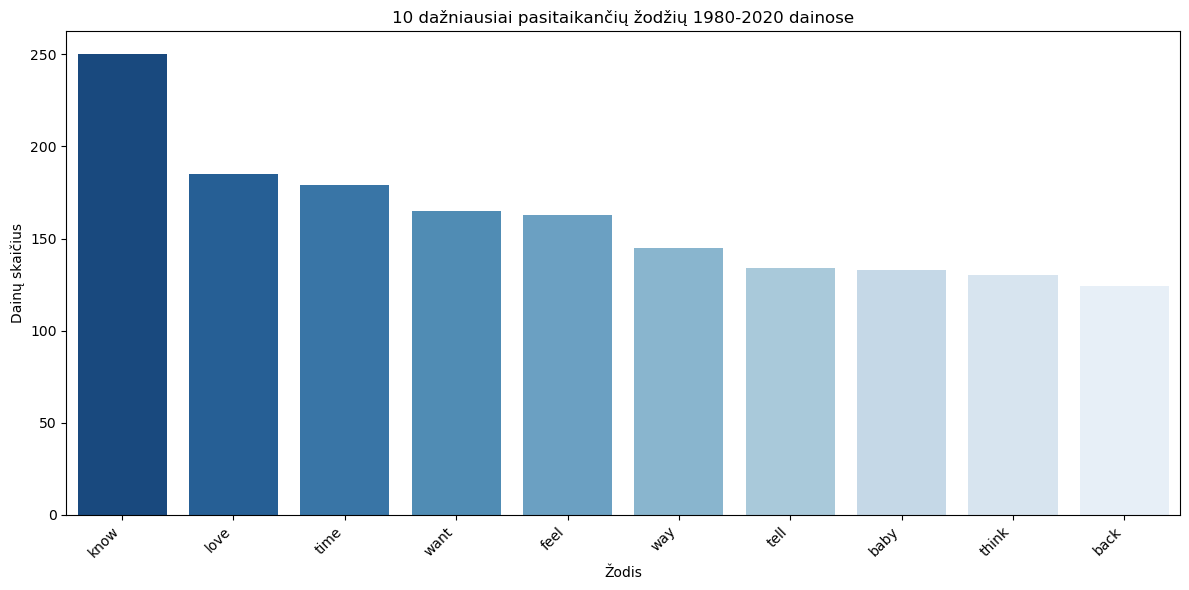

In [16]:
top_words = word_in_songs_counter.most_common(top)
df = pd.DataFrame(top_words, columns = ["word", "count"])

colors = sns.color_palette("Blues", n_colors=len(df))
colors = list(reversed(colors))

plt.figure(figsize = (12, 6))
sns.barplot(data = df, x = "word", y = "count", palette = colors)

plt.xticks(rotation = 45, ha = "right")
plt.title("10 dažniausiai pasitaikančių žodžių 1980-2020 dainose")
plt.xlabel("Žodis")
plt.ylabel("Dainų skaičius")
plt.tight_layout()
plt.show()

# Visualization by period

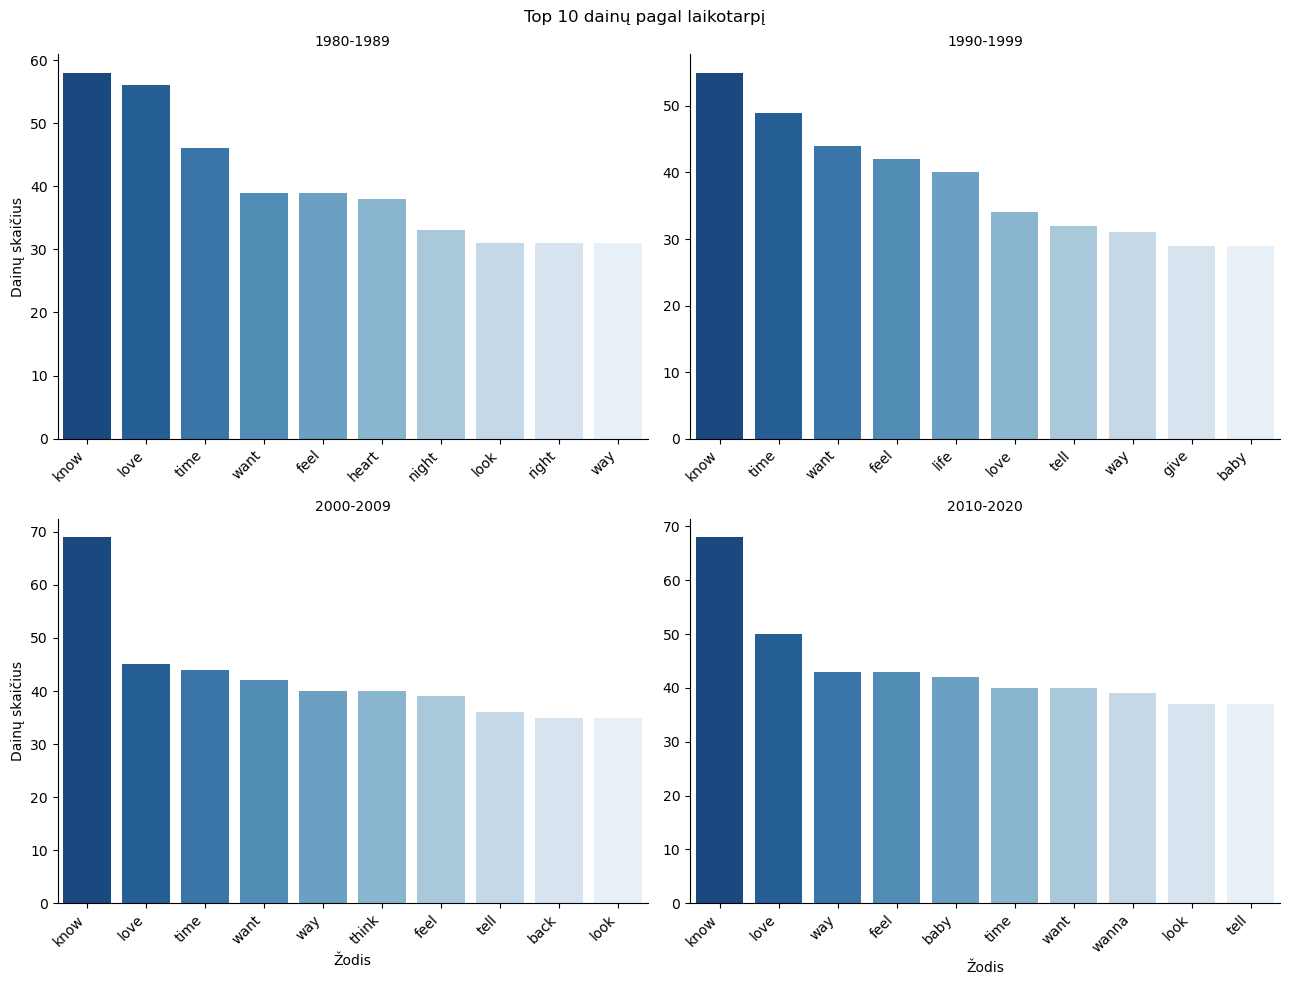

In [17]:
records = []

for label, counter in period_word_counters.items():
    for word, count in counter.most_common(top_p):
        records.append({"decade": label, "word": word, "count": count})

df_period = pd.DataFrame(records)

g = sns.FacetGrid(df_period, col = "decade", col_wrap = 2, height = 5, aspect = 1.3, sharex = False, sharey = False)

def draw_barplot(data, **kwargs):
    sorted_data = data.sort_values("count", ascending = False)
    colors = sns.color_palette("Blues", n_colors = len(sorted_data))
    sns.barplot(data = sorted_data, x = "word", y = "count", palette = list(reversed(colors)), **kwargs)

g.map_dataframe(draw_barplot)

g.set_titles("{col_name}")
g.set_axis_labels("Žodis", "Dainų skaičius")

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right")

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Top 10 dainų pagal laikotarpį")
plt.tight_layout()
plt.show()